<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/homework/coding_homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #6

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw6.csv</code>, <code>acc_fa_hw6.csv</code>, <code>lc_hits_hw6.csv</code>, and <code>lc_fa_hw6.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code>, <code>acc_fa</code>, <code>lc_hits</code>, and <code>lc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array.

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex, and both your <code>lc_hits</code> and <code>lc_fa</code> arrays consist of LFP data simultaneously recorded from the mouse locus coeruleus (an area in the brainstem with neurons that produce the neurotransmitter norepinephrine). Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). Similarly to last week, the task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> and <code>lc_hits</code> variables contain LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> and <code>lc_fa</code> variables contain LFP surrounding these false alarms. So, you have four arrays - two arrays with LFP recorded during correct choices (hits), and two arrays with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as your four arrays, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_hits</code> in the same plot in <font color = 'blue'>blue</font> in one subplot. In a second subplot, plot the first trial of <code>acc_fa</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_fa</code> in <font color = 'blue'>blue</font>. Put time on the x-axis of both of your subplots. Label the axes of your subplots.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation in the ACC LFP might be, and what the dominant oscillation in the locus coeruleus (LC) LFP might be. Are the two different? By visual inspection, do you notice any relationship between the two brain areas during the "hit" you plotted, or the "false alarm" you plotted? Recall from our notebook on phase coherence that sometimes the peaks and troughs of two oscillations have a consistent relationship across time. Is there any evidence of this in the raw LFP?

10. In a new *Code Cell*, compute the coherence for <code>acc_hits</code> and <code>lc_hits</code>. Make sure to follow the steps in the "Computing the Coherence" section of our notebook from last week. The end result should be a plot with "Frequency (Hz)" on the x-axis, and "Coherence" on the y-axis. Label your axes.

11. In a new *Markdown Cell*, describe your results. In which frequency band is there the most phase coherence during hits?

12. In a new *Code Cell*, repeat step 10, but with <code>acc_fa</code> and <code>lc_fa</code>. Plot the results from step 10 in <font color = 'red'>red</font>, and the results from this step in <font color = 'blue'>blue</font>, in the same plot (in other words, you should have one plot, with two different lines on it - one will be the coherence for "hits" that you calculated in step 10, and one will be the coherence for "false alarms"). Label your axes.

13. In a new *Markdown Cell*, intepret your plot from step 12. Is the frequency at which coherence is strongest different between hits and false alarms? Is coherence higher/lower during hits vs. false alarms? If higher coherence means more communication between the ACC and LC, are these two brain areas talking to each more or less during hits vs. false alarms?

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_6.ipynb</code>.





###Lindsey Huppin
*Intro to Neural Data Analysis*

**3/29/24**

In [1]:
#2 importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#3 importing data
acc_hits = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/acc_hits_hw6.csv',delimiter = ',')
acc_fa = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/acc_fa_hw6.csv',delimiter = ',')
lc_hits = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/lc_hits_hw6.csv',delimiter = ',')
lc_fa = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/lc_fa_hw6.csv',delimiter = ',')

In [6]:
#4 printing shapes
print(acc_hits.shape)
print(acc_fa.shape)
print(lc_hits.shape)
print(lc_fa.shape)

(14, 8001)
(19, 8001)
(14, 8001)
(19, 8001)


In [14]:
#6 creating time variable
time = np.linspace(0,4,acc_hits.shape[1])

In [17]:
#7 find sampling rate
sampling_rate = acc_hits.shape[1]/4
sampling_rate

2000.25

Text(0.5, 1.0, 'False Alarms')

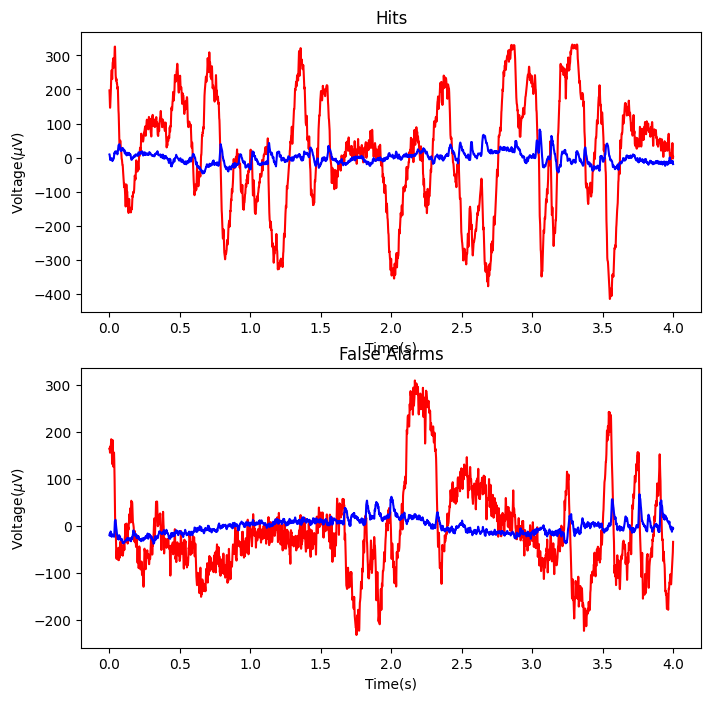

In [24]:
#8 plotting data
fig,ax = plt.subplots(2,1, figsize = [8,8])
ax[0].plot(time,acc_hits[0],'r')
ax[0].plot(time,lc_hits[0],'b')
ax[1].plot(time,acc_fa[0],'r')
ax[1].plot(time,lc_fa[0],'b')
ax[0].set_xlabel('Time(s)')
ax[1].set_xlabel('Time(s)')
ax[0].set_ylabel('Voltage($\mu$V)')
ax[1].set_ylabel('Voltage($\mu$V)')
ax[0].set_title('Hits')
ax[1].set_title('False Alarms')

###9
ACC has a dominating oscillation of about 4 Hz since there's about 16-17 peaks for the hits and about 15-16 for fa. The LC has a dominating oscillation of about 6 Hz since there's about 24 peaks on the hits and about 21 peaks on the fa. The peaks on LC are very small compared to the ACC and could easily be considered as one or two peaks accross four seconds so a dominating oscillation of about .5 Hz. During the hits, there is a bit of a peak in the LC as the ACC is decreasing. The same case is roughly the same for the false alarms where the LC appears to spike when the inflection point of the downward part of ACC occurs.

Text(0.5, 1.0, 'Coherence between two electrodes')

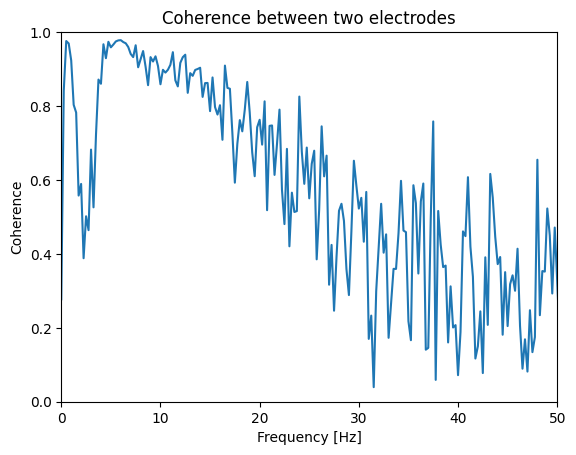

In [25]:
#10 Calculating the coherance of ACC and LC hits

dt = time[1] - time[0]              # Define the sampling interval.
K = acc_hits.shape[0]               # Define the number of trials.
N = lc_hits.shape[1]               # Define number of points in each trial.
ac = np.zeros([2 * N - 1])       # Declare empty vector for autocov.

# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in acc_hits])  # ... for each trial in E1
yf = np.array([np.fft.rfft(y - y.mean()) for y in lc_hits])  # ... and each trial in E2

# Compute the spectra
T = time[-1]
scale = 2 * dt**2 / T
Sxx = scale * (xf * xf.conj()).mean(0)  # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)  # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr = np.abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, cohr.real)                      # Plot coherence vs frequency,
plt.xlim([0, 50])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')


###11
There's a lot of frequencies that have high coherence. However, 1 Hz and 7 Hz have significantly higher coherence than the other points since they're maxes.

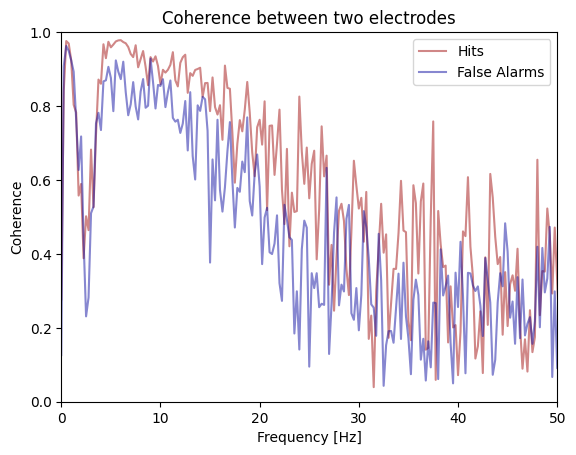

In [31]:
#12 Calculating the coherance of ACC and LC hits and false alarms

dt = time[1] - time[0]              # Define the sampling interval.
K1 = acc_hits.shape[0]               # Define the number of trials.
K2 = acc_fa.shape[0]               # Define the number of trials.
N = acc_hits.shape[1]               # Define number of points in each trial.
ac = np.zeros([2 * N - 1])       # Declare empty vector for autocov.

# Compute the Fourier transforms
xf1 = np.array([np.fft.rfft(x - x.mean()) for x in acc_hits])  # ... for each trial in E1
yf1 = np.array([np.fft.rfft(y - y.mean()) for y in lc_hits])  # ... and each trial in E2
xf2 = np.array([np.fft.rfft(x - x.mean()) for x in acc_fa])  # ... for each trial in E1
yf2 = np.array([np.fft.rfft(y - y.mean()) for y in lc_fa])  # ... and each trial in E2

# Compute the spectra
T = time[-1]
scale = 2 * dt**2 / T
Sxx1 = scale * (xf1 * xf1.conj()).mean(0)  # Spectrum of E1 trials
Syy1 = scale * (yf1 * yf1.conj()).mean(0)  # ... and E2 trials
Sxy1 = scale * (xf1 * yf1.conj()).mean(0)  # ... and the cross spectrum

Sxx2 = scale * (xf2 * xf2.conj()).mean(0)  # Spectrum of E1 trials
Syy2 = scale * (yf2 * yf2.conj()).mean(0)  # ... and E2 trials
Sxy2 = scale * (xf2 * yf2.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr1 = np.abs(Sxy1) / (np.sqrt(Sxx1) * np.sqrt(Syy1))
cohr2 = np.abs(Sxy2) / (np.sqrt(Sxx2) * np.sqrt(Syy2))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, cohr1.real,'#9f0a0a7d')                      # Plot coherence vs frequency,
plt.plot(f, cohr2.real,'#0a0a9f7d')                      # Plot coherence vs frequency,
plt.xlim([0, 50])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')
plt.legend(['Hits','False Alarms'])


###13
The highest points of coherence for the hits has a slighty higher coherence than the false alarms at those frequencies. In general the coherence of the hits is higher than the coherence of the false alarms. This shows that the two brain regions, ACC and LC, communicate with each other more during hits than during false alarms. However, the strongest points of coherence for the false alarms and the hits are both at the same frequencies of about 1 Hz and 7 Hz.